In [17]:
import numpy as np
import pandas as pd
from IPython.display import display
import visuals as vs

%matplotlib inline

try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [18]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [19]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [20]:
indices = [85,181,338]

samples = pd.DataFrame(data.loc[indices],columns = data.keys()).reset_index(drop=True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,112151,29627,18148,16745,4948,8550
2,3,333,7021,15601,15,550


In [21]:
data.head(1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338


In [22]:
new_data = data.drop('Grocery',axis = 1)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(new_data,data.Grocery,test_size = 0.25, random_state = 42)

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor = regressor.fit(X_train,y_train)
prediction = regressor.predict(X_test)

from sklearn.metrics import r2_score

score = r2_score(y_test,prediction)
print("Prediction score is :{}".format(score))

Prediction score is :0.7079039643897356


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2f518eef0>,
      dtype=object)

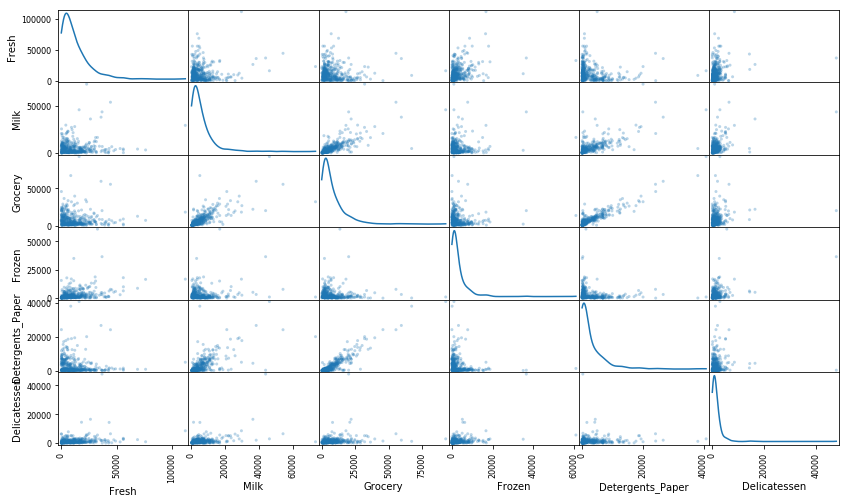

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,alpha = 0.3,figsize = (14,8),diagonal = 'kde')

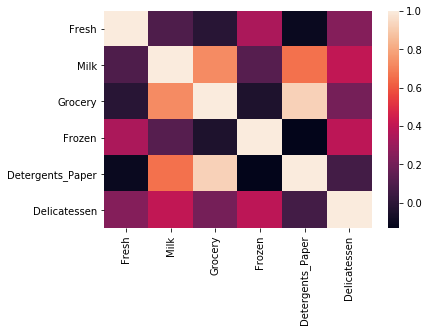

In [24]:
import seaborn as sns
sns.heatmap(data.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2f6070eb8>,
      dtype=object)

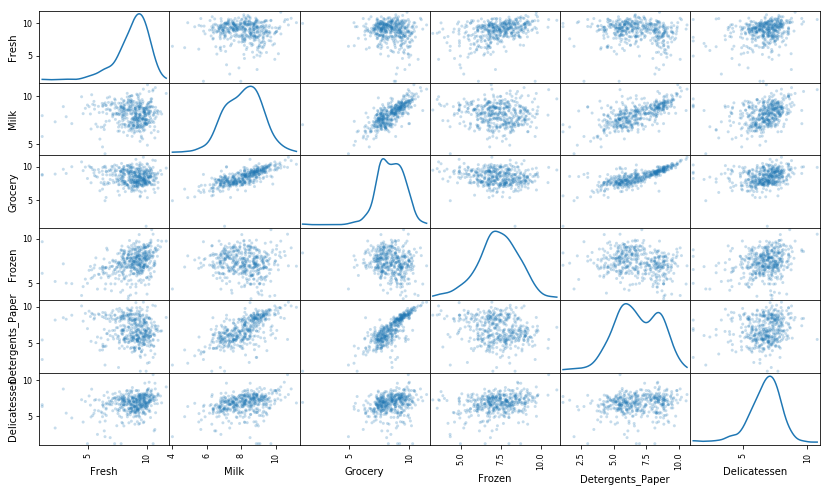

In [25]:
from pandas.plotting import scatter_matrix
log_data = np.log(data)
log_samples = np.log(samples)
scatter_matrix(log_data,alpha = 0.25,figsize = (14,8),diagonal = 'kde')

In [26]:
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


In [27]:
outliers = []
for feature in log_data.keys():
    Q1 = np.percentile(log_data[feature],25)
    Q3 = np.percentile(log_data[feature],75)
    
    step  = 1.5*(Q3-Q1)
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    lista = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    outliers.append(lista)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [28]:
outliers

[[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412],
 [86, 98, 154, 356],
 [75, 154],
 [38, 57, 65, 145, 175, 264, 325, 420, 429, 439],
 [75, 161],
 [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]]

In [29]:
seen = {}
dupes = []

for lista in outliers:
    for index in lista:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] == 1:
                dupes.append(index)
            seen[index] += 1
dupes = sorted(dupes)
dupes

[65, 66, 75, 128, 154]

In [30]:
good_data = log_data.drop(dupes,axis = 0).reset_index(drop=True)

In [31]:
log_samples.shape

(3, 6)

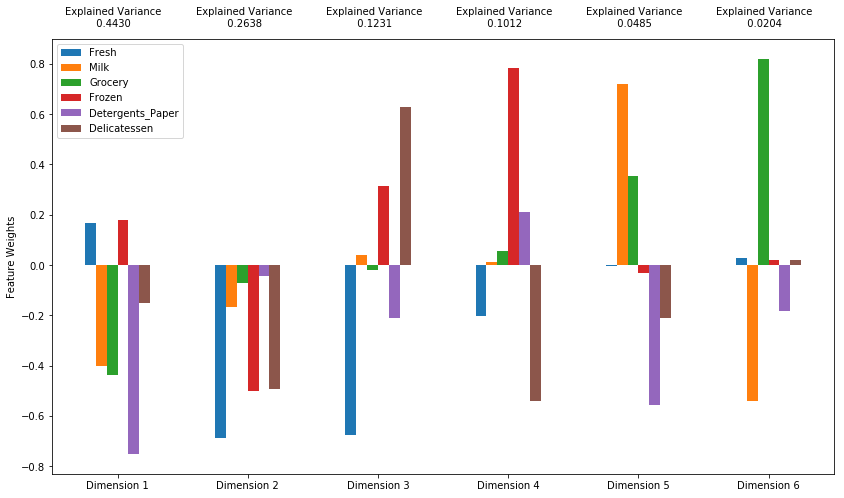

In [65]:
from sklearn.decomposition import PCA
import visuals as vs
pca = PCA(n_components=good_data.shape[1])
pca = pca.fit(good_data)

pca_samples = pca.transform(log_samples)
pca_results = vs.pca_results(good_data, pca)

In [66]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3316,-1.8845,-0.6957,-0.1972,0.5461,0.3802
1,-2.1899,-4.8605,0.0008,0.4827,0.5041,-0.1988
2,3.0206,4.8169,6.4519,2.7403,0.7788,2.1415


In [68]:
pca = PCA(n_components = 2).fit(good_data)
reduced_data = pca.transform(good_data)
pca_samples = pca.transform(log_samples)

reduced_data = pd.DataFrame(reduced_data,columns = ['Dimension 1','Dimension 2'])

In [80]:
display(pd.DataFrame(np.round(pca_samples,4),columns = ['Dimension 1','Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3316,-1.8845
1,-2.1899,-4.8605
2,3.0206,4.8169


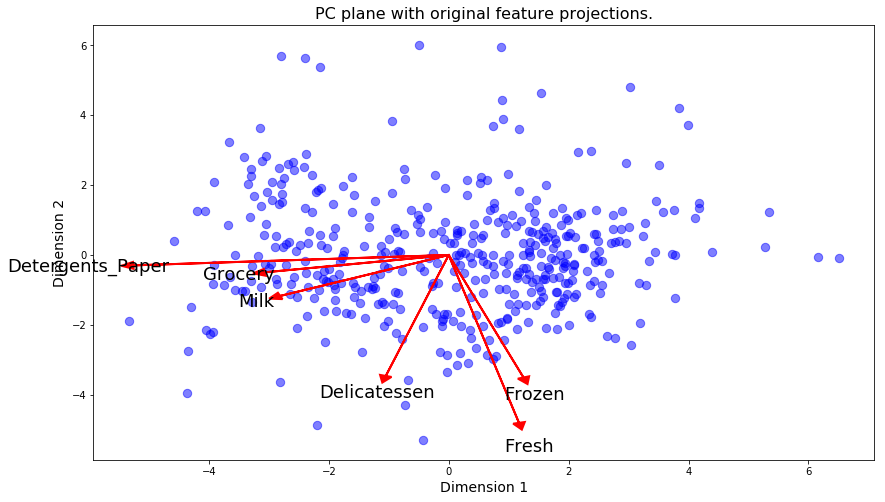

In [83]:
vs.biplot(good_data,reduced_data,pca)

In [89]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores = {}
for i in range(2,7):
    print('No of cluster : '+str(i))
    clusterer = GaussianMixture(random_state = 42,n_components = i)
    clusterer.fit(reduced_data)
    
    preds = clusterer.predict(reduced_data)
    
    centers = clusterer.means_
    print('Cluster centers : '+str(centers))
    
    sample_preds = clusterer.predict(pca_samples)
    print('Sample predictions : ' + str(sample_preds))
    
    score = silhouette_score(reduced_data,preds)
    scores[i] = score
    print('Silhouette score is : ' + str(score) + '\n')
    
print('Scores : ' + str(scores))

No of cluster : 2
Cluster centers : [[ 1.2512378  -0.18013806]
 [-2.22116886  0.31977698]]
Sample predictions : [1 1 0]
Silhouette score is : 0.4219168464626149

No of cluster : 3
Cluster centers : [[ 1.3874837  -0.24378903]
 [-2.04781298 -0.05820189]
 [-1.08932369  1.063399  ]]
Sample predictions : [2 2 2]
Silhouette score is : 0.4042487382407879

No of cluster : 4
Cluster centers : [[ 1.36580355  0.2583133 ]
 [-2.3145402   0.01022103]
 [-0.32043976  1.79401921]
 [ 1.17387101 -0.79626779]]
Sample predictions : [2 1 2]
Silhouette score is : 0.2932695648465841

No of cluster : 5
Cluster centers : [[ 1.71130552 -0.22201663]
 [-2.08799545 -0.5201485 ]
 [ 2.20617662  2.92837026]
 [ 0.03785843 -0.70356503]
 [-2.79826984  1.54857783]]
Sample predictions : [1 3 2]
Silhouette score is : 0.3004563887252593

No of cluster : 6
Cluster centers : [[ 0.62535432  0.56453323]
 [-1.99042622 -0.67842086]
 [ 2.11689604  3.15226455]
 [ 0.50197961 -1.80803617]
 [-2.79898205  1.72544922]
 [ 1.93033498 -0.34

TypeError: '(slice(None, None, None), 0)' is an invalid key

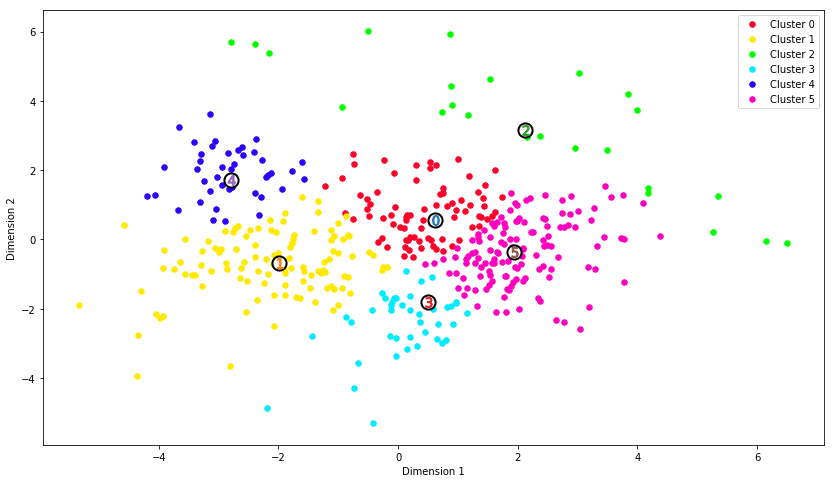

In [102]:
vs.cluster_results(reduced_data,preds,centers,pca_results)

In [98]:
log_centers = pca.inverse_transform(centers)
true_centers = np.exp(log_centers)

segments = ['Segments {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers),columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segments 0,4838.0,2399.0,3451.0,1279.0,547.0,556.0
Segments 1,7322.0,8441.0,11852.0,1494.0,4119.0,1522.0
Segments 2,1053.0,855.0,1495.0,457.0,160.0,124.0
Segments 3,24123.0,3749.0,4308.0,4101.0,664.0,1831.0
Segments 4,1230.0,7812.0,14249.0,388.0,6829.0,524.0
Segments 5,11250.0,1655.0,2078.0,2546.0,213.0,718.0


In [100]:
for i,pred in enumerate(sample_preds):
    print("Sample point",i,"predicted in cluster",pred)

Sample point 0 predicted in cluster 1
Sample point 1 predicted in cluster 3
Sample point 2 predicted in cluster 2


TypeError: list indices must be integers or slices, not float

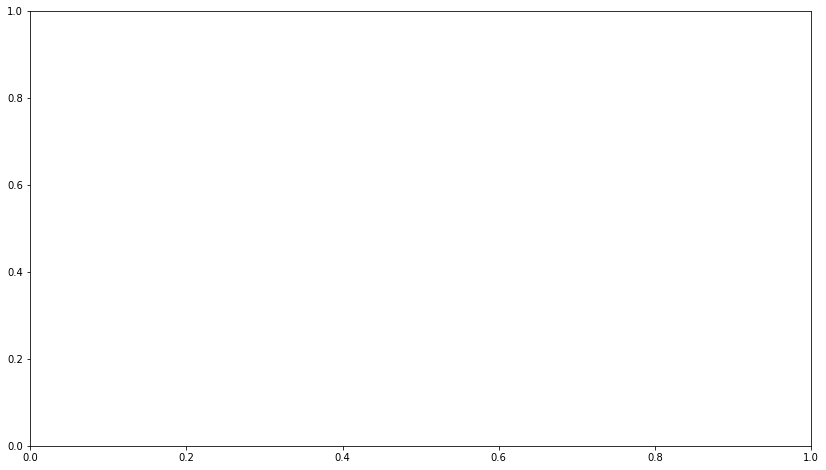

In [103]:
vs.channel_results(reduced_data,preds,pca_samples)